## Filters on Large Datasets

In [1]:
# # Uncomment the following lines to run the notebook in the root directory of the repository
# import os

# # set the current working directory
# curr_path = os.getcwd().split("/")[:-2]
# curr_path = "/".join(curr_path)
# os.chdir(curr_path)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from pytspl import load_dataset, SCPlot

# load the chicago sketch dataset
sc, coordinates, flow = load_dataset("chicago-sketch")

# convert the flow to an numpy array
flow = np.asarray(list(flow.values()))

Num. of nodes: 546
Num. of edges: 1088
Num. of triangles: 112
Shape: (546, 1088, 112)
Max Dimension: 2
Coordinates: 546
Flow: 1088


### Plot SC

In [4]:
scplot = SCPlot(simplicial_complex=sc, coordinates=coordinates)

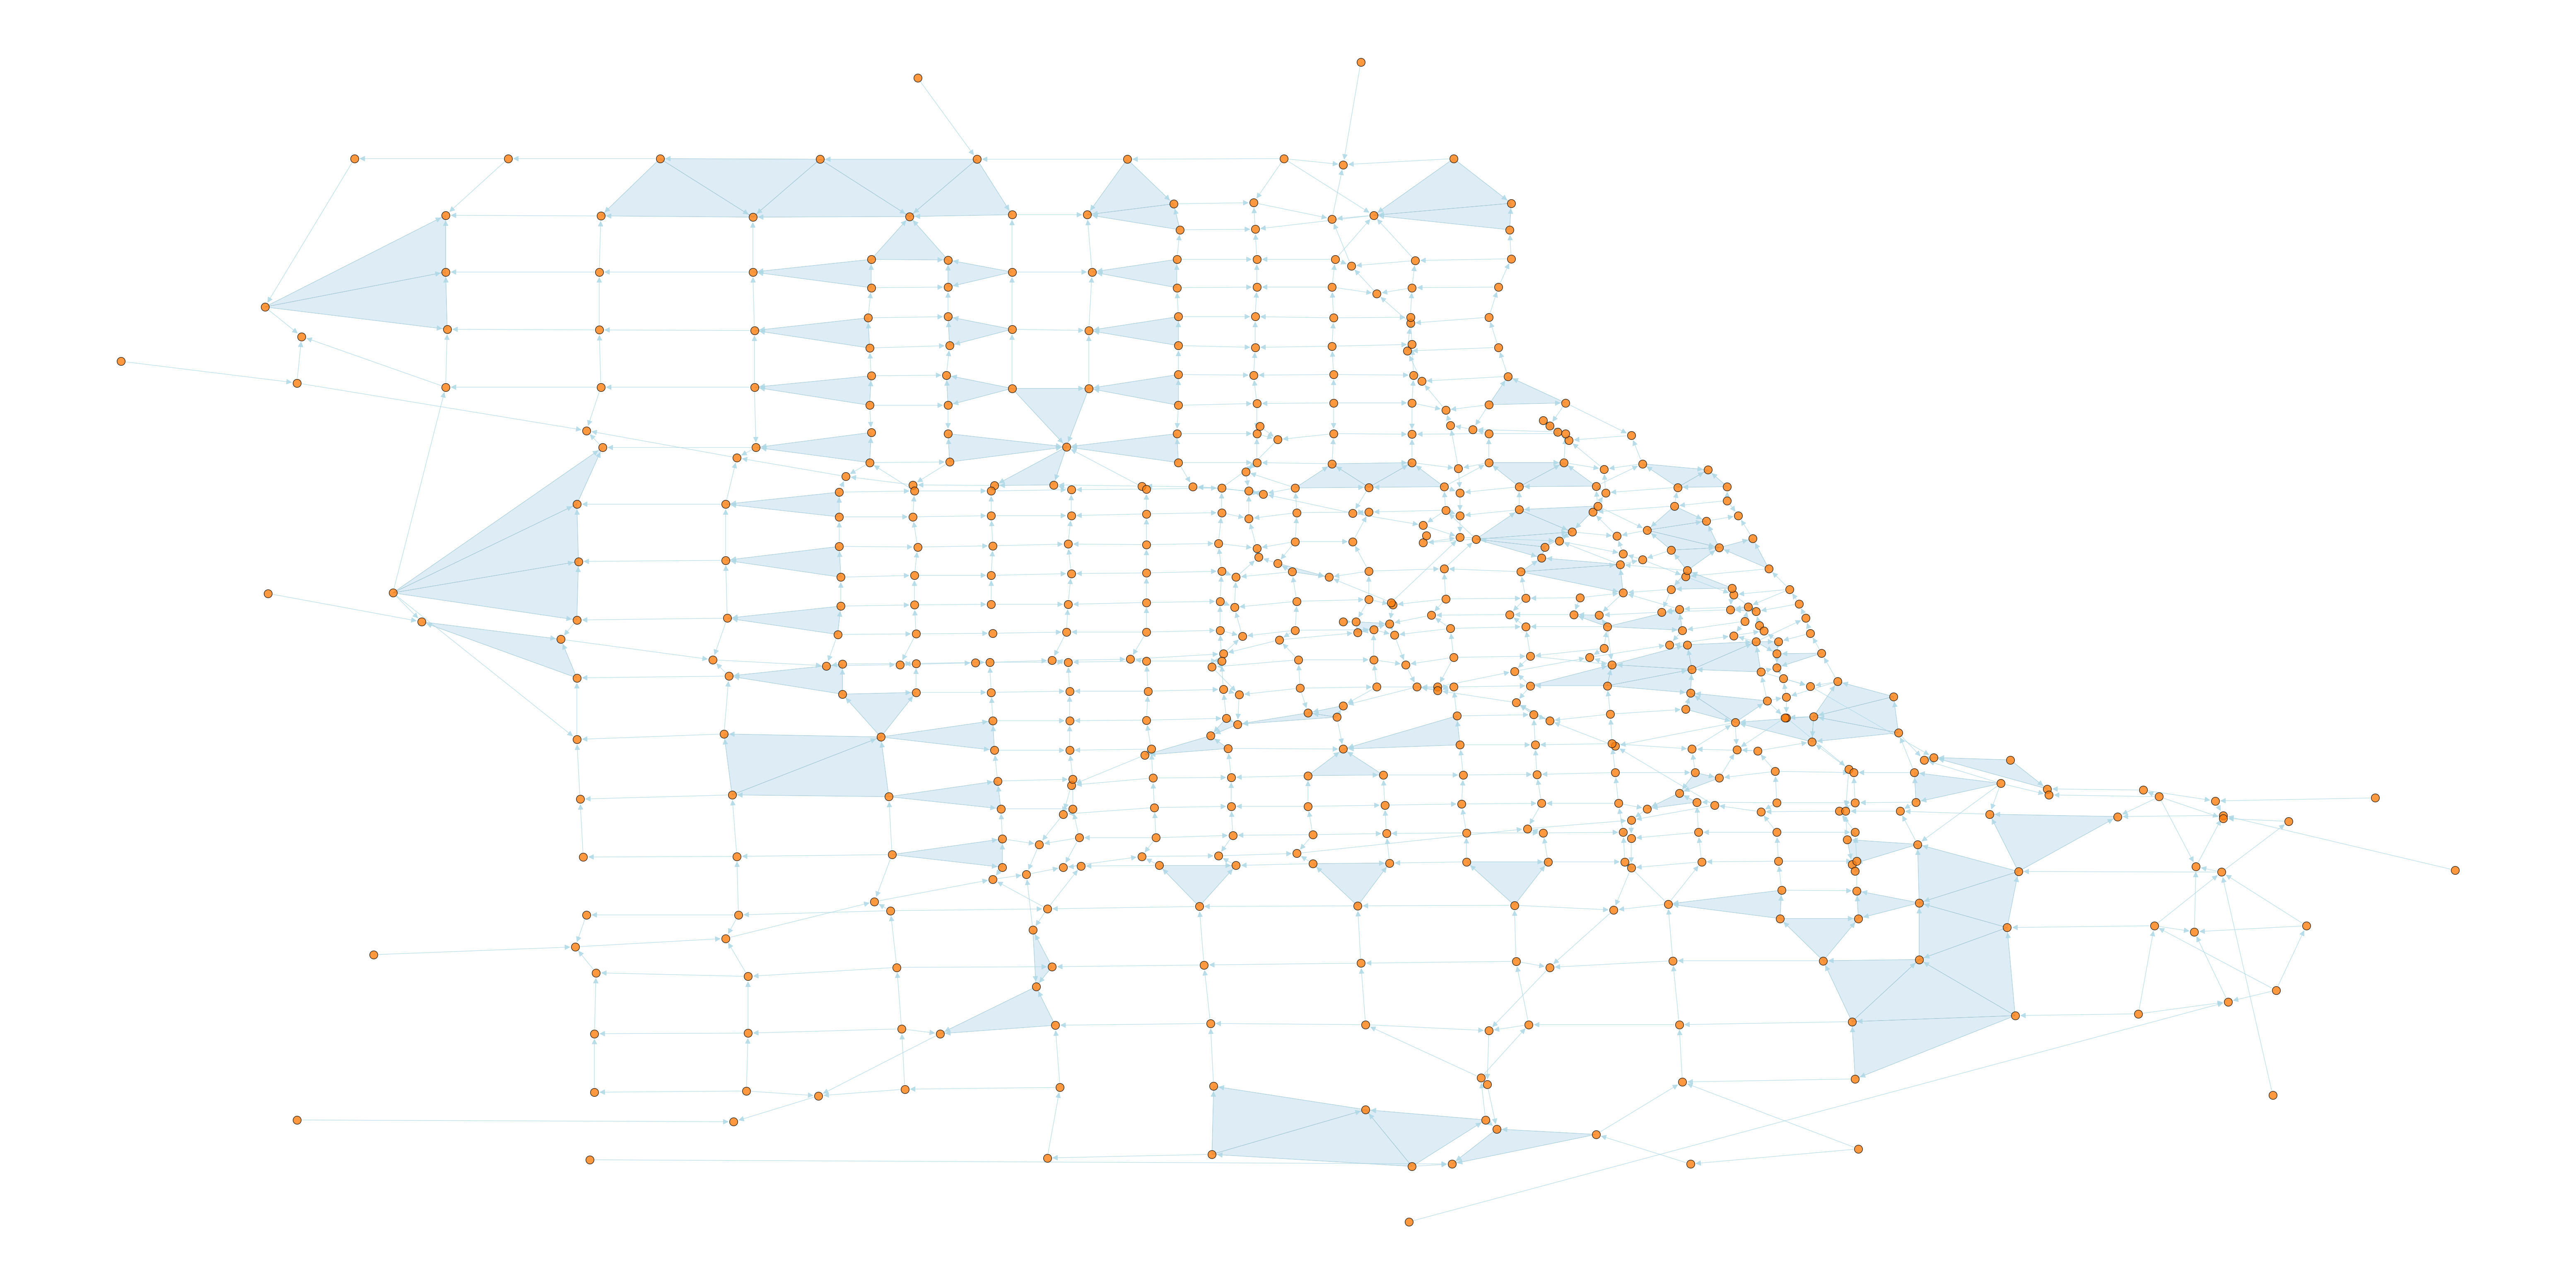

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(80, 40))
scplot.draw_network(with_labels=False, node_size=200, arrowsize=20, ax=ax)

### Filters

#### Edge flow denoising

In [6]:
from pytspl.filters import EdgeFlowDenoising

# denoising with lowe pass filter
efd = EdgeFlowDenoising(simplicial_complex=sc)
mu_vals = [i/100 for i in range(1, 10)]
efd.denoise(f=flow, f_true=flow, p_choice="L1", mu_vals=mu_vals)

f_est_L1 = efd.history["f_estimated"]

mu: 0.01, error: 0.01216636501100936
mu: 0.02, error: 0.02332483210797497
mu: 0.03, error: 0.033627052510036795
mu: 0.04, error: 0.04319253143617094
mu: 0.05, error: 0.052117201419393216
mu: 0.06, error: 0.060479294718037174
mu: 0.07, error: 0.06834348102624978
mu: 0.08, error: 0.07576385444634778
mu: 0.09, error: 0.08278613558305639


#### LS Filter Design

In [7]:
from pytspl.filters import LSFilterDesign

lsfilter = LSFilterDesign(simplicial_complex=sc)

In [8]:
filter_size = 10

lsfilter.subcomponent_extraction_type_two(
    f=flow, component="gradient", L=filter_size
)

Filter size: 0 - Error: 0.5767144015454567
Filter size: 1 - Error: 0.5733410151652752
Filter size: 2 - Error: 0.5681635016856332
Filter size: 3 - Error: 0.561701467084827
Filter size: 4 - Error: 0.5530710790521391
Filter size: 5 - Error: 0.5426445621097569
Filter size: 6 - Error: 0.5311323570831609
Filter size: 7 - Error: 0.5188161033027159
Filter size: 8 - Error: 0.5059164150040393
Filter size: 9 - Error: 0.4927047150378522


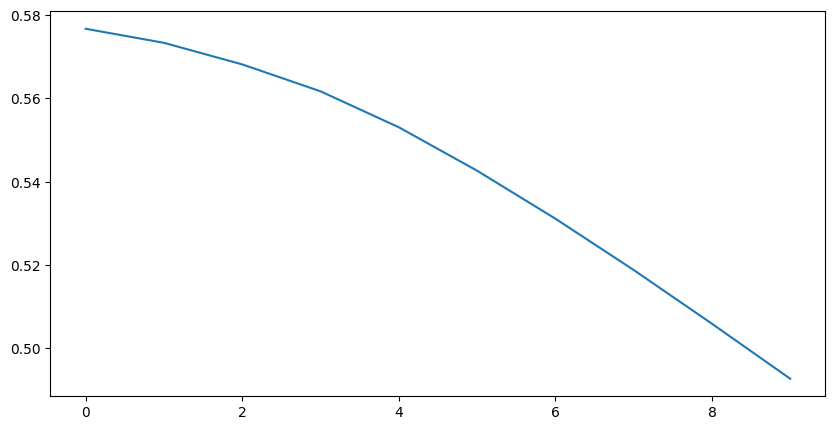

In [9]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(lsfilter.history["extracted_component_error"])

#### Grid-based filter design

In [7]:
from pytspl.filters import GridBasedFilterDesign

gridfilter = GridBasedFilterDesign(simplicial_complex=sc)

In [10]:
filter_size = 10

gridfilter.subcomponent_extraction(
   f=flow, 
   component="gradient",
   p_choice="L1L", 
   L=filter_size, 
   num_of_samples=100
)

Filter size: 0 - Error: 0.5735921535959483
Filter size: 1 - Error: 0.5617645954903557
Filter size: 2 - Error: 0.5440603349695341
Filter size: 3 - Error: 0.5228643832148511
Filter size: 4 - Error: 0.5007744543415135
Filter size: 5 - Error: 0.48017404038185507
Filter size: 6 - Error: 0.46267778374239166
Filter size: 7 - Error: 0.448797288109204
Filter size: 8 - Error: 0.4381081326218379
Filter size: 9 - Error: 0.4295298085110113


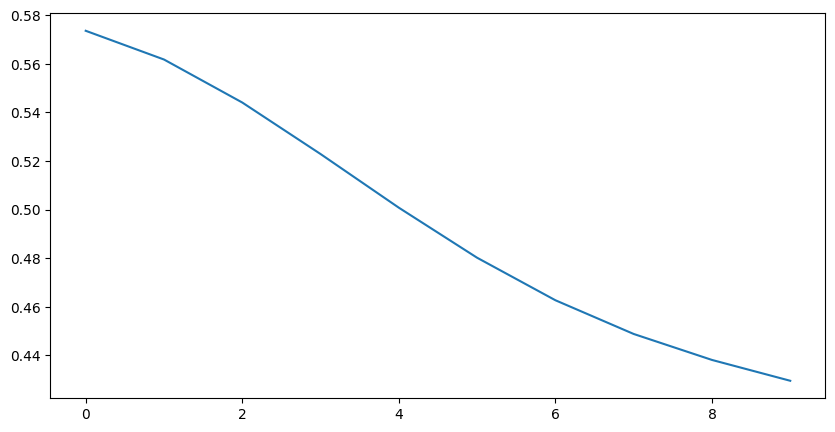

In [11]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(gridfilter.history["extracted_component_error"])

### Chebyshev filter design

In [11]:
from pytspl.filters import ChebyshevFilterDesign

chebfilter = ChebyshevFilterDesign(simplicial_complex=sc)

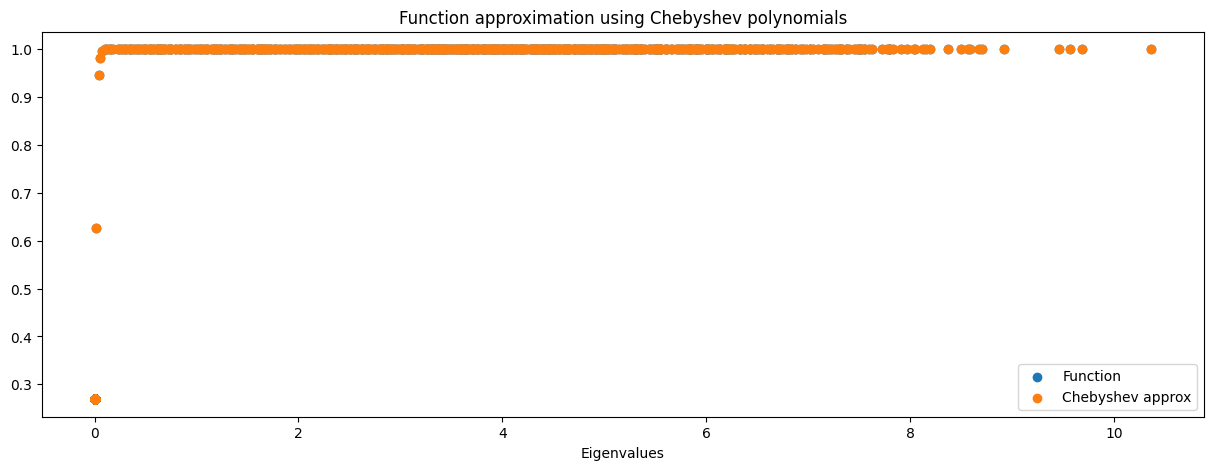

In [12]:
chebfilter.plot_chebyshev_series_approx(p_choice="L1L")

In [13]:
filter_size = 50

chebfilter.apply(f=flow, p_choice="L1L", component="gradient", L=filter_size, cut_off_frequency=0.01, steep=100, n=100)

Calculating Chebyshev filter approximation for k = 0...
Calculating Chebyshev filter approximation for k = 1...
Calculating Chebyshev filter approximation for k = 2...
Calculating Chebyshev filter approximation for k = 3...
Calculating Chebyshev filter approximation for k = 4...
Calculating Chebyshev filter approximation for k = 5...
Calculating Chebyshev filter approximation for k = 6...
Calculating Chebyshev filter approximation for k = 7...
Calculating Chebyshev filter approximation for k = 8...
Calculating Chebyshev filter approximation for k = 9...
Calculating Chebyshev filter approximation for k = 10...
Calculating Chebyshev filter approximation for k = 11...
Calculating Chebyshev filter approximation for k = 12...
Calculating Chebyshev filter approximation for k = 13...
Calculating Chebyshev filter approximation for k = 14...
Calculating Chebyshev filter approximation for k = 15...
Calculating Chebyshev filter approximation for k = 16...
Calculating Chebyshev filter approximatio

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

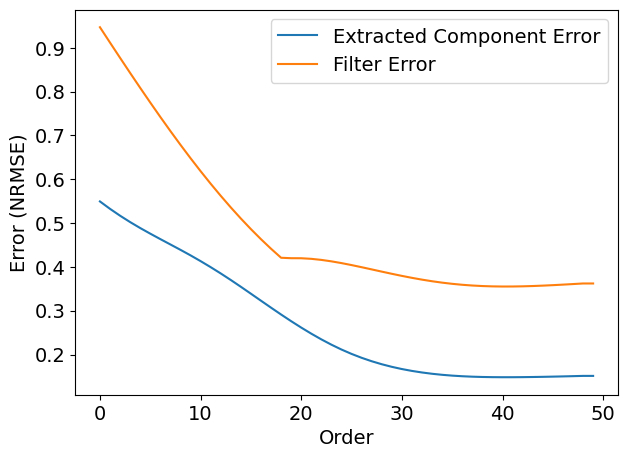

In [14]:
# plot error
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

plt.plot(chebfilter.history["extracted_component_error"])
plt.plot(chebfilter.history["filter_error"])

plt.legend(["Extracted Component Error", "Filter Error"], fontsize=14)

plt.xlabel("Order", fontsize=14)
plt.ylabel("Error (NRMSE)", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

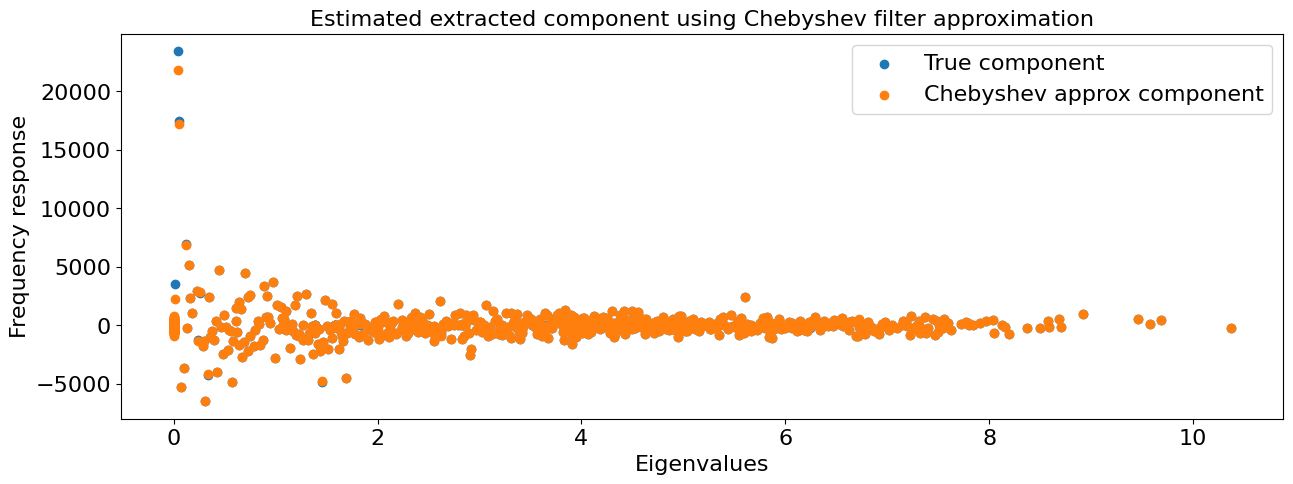

In [15]:
chebfilter.plot_frequency_response_approx(flow=flow, component="gradient", fontdict={"fontsize": 16})

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9000000000000001, '0.9'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.1, '1.1'),
  Text(0, 1.2, '1.2')])

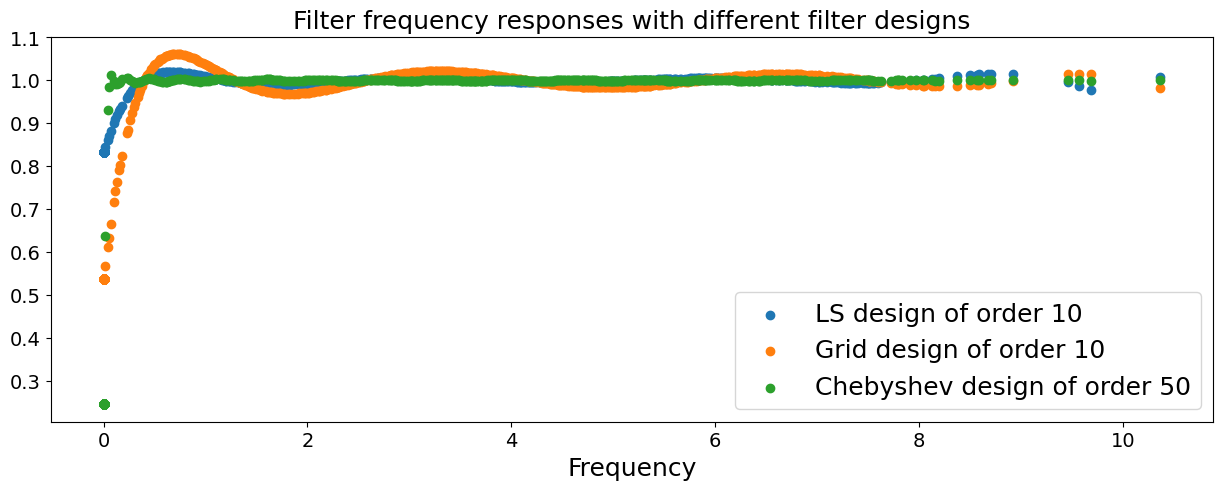

In [22]:

from pytspl.decomposition.eigendecomposition import get_eigendecomposition

component = "gradient"
ls_filter = lsfilter.history["filter"]
grid_filter = gridfilter.history["filter"]
cheb_filter = chebfilter.history["filter"][-1]

P = chebfilter.get_p_matrix("L1L").toarray()
U, eigenvalues = get_eigendecomposition(lap_mat=P)
# get the true signal
f_true = chebfilter.get_true_signal(f=flow, component=component)

f_cheb_tilde = chebfilter.history["frequency_responses"]

plt.figure(figsize=(15, 5))

plt.scatter(eigenvalues, np.diag(U.T @ ls_filter @ U))
plt.scatter(eigenvalues, np.diag(U.T @ grid_filter @ U))
plt.scatter(eigenvalues, np.diag(U.T @ cheb_filter @ U))
plt.title(
    "Filter frequency responses with different filter designs", fontsize=18
)
# add legend
plt.legend(["LS design of order 10", "Grid design of order 10", "Chebyshev design of order 50"], fontsize=18)

plt.xlabel("Frequency", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-10000.,  -5000.,      0.,   5000.,  10000.,  15000.,  20000.,
         25000.]),
 [Text(0, -10000.0, '−10000'),
  Text(0, -5000.0, '−5000'),
  Text(0, 0.0, '0'),
  Text(0, 5000.0, '5000'),
  Text(0, 10000.0, '10000'),
  Text(0, 15000.0, '15000'),
  Text(0, 20000.0, '20000'),
  Text(0, 25000.0, '25000')])

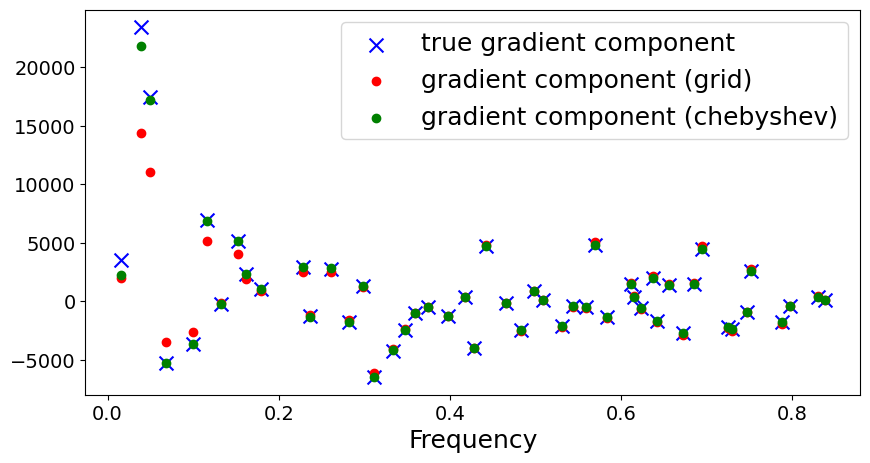

In [44]:
# SFT of the extracted gradient component
from pytspl.decomposition.eigendecomposition import get_gradient_eigenpair

L1L = lsfilter.get_p_matrix("L1L").toarray()
U_G, eigenvalues_g = get_gradient_eigenpair(L1L, 1e-3)


f_g_tilde = U_G.T @ flow

grid_freq_response = U_G.T @ grid_filter @ flow
cheb_freq_response = U_G.T @ cheb_filter @ flow

plt.figure(figsize=(10, 5))

plt.scatter(eigenvalues_g[:filter_size], f_g_tilde[:filter_size], color="blue", marker="x", s=100)
plt.scatter(eigenvalues_g[:filter_size], grid_freq_response[:filter_size], color="red")
plt.scatter(eigenvalues_g[:filter_size], cheb_freq_response[:filter_size], color="green")

plt.legend(["true gradient component", "gradient component (grid)", "gradient component (chebyshev)"], fontsize=18)

# x-axis label
plt.xlabel("Frequency", fontsize=18)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
